In [2]:
import matplotlib.pyplot as plt
import numpy as np

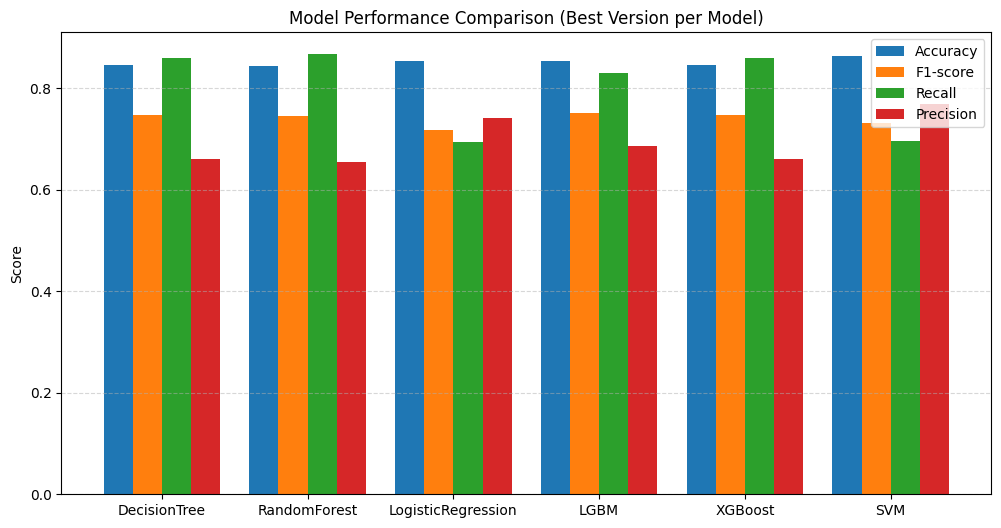

In [ ]:

# 모델 이름
models = ["DecisionTree", "RandomForest", "LogisticRegression", "LGBM", "XGBoost", "SVM"]

# 성능 지표
accuracy = [0.845542305508234, 0.8438387279954571, 0.85451,0.8540601930721181, 0.845542305508234, 0.8642816581487791]
f1 = [0.7472118959107806, 0.7465437788018433, 0.71724, 0.7512100677637947, 0.7472118959107806, 0.7311586051743532]
recall = [0.860813704496788, 0.867237687366167, 0.69519, 0.8308351177730193, 0.860813704496788, 0.69593147751606]
precision = [0.6600985221674877, 0.6553398058252428, 0.74074, 0.6855123674911661, 0.6600985221674877, 0.7701421800947867]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x - width*1.5, accuracy, width, label='Accuracy')
plt.bar(x - width*0.5, f1, width, label='F1-score')
plt.bar(x + width*0.5, recall, width, label='Recall')
plt.bar(x + width*1.5, precision, width, label='Precision')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Best Version per Model)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:22:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


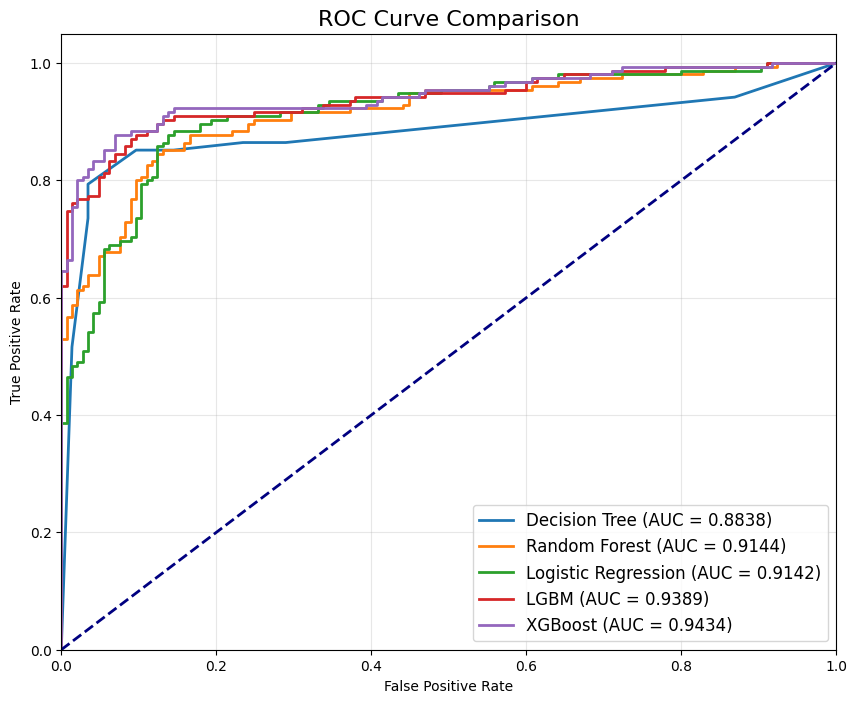

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 모델 라이브러리 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# -------------------------------------------------------
# 1. 데이터 준비 (사용자분의 X_train, y_test 등으로 교체하세요)
# -------------------------------------------------------
# 예시용 가상 데이터 생성
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------------------------------
# 2. 모델 정의 (딕셔너리 활용)
# -------------------------------------------------------
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5,random_state=0),
    "Random Forest": RandomForestClassifier(max_depth=5,random_state=0),
    "Logistic Regression": LogisticRegression(random_state=0),
    "LGBM": LGBMClassifier(random_state=0, verbose=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
}

# -------------------------------------------------------
# 3. 그래프 그리기 (반복문)
# -------------------------------------------------------
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측 확률값 추출 (양성 클래스인 1에 대한 확률)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # ROC Curve 계산
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # 그래프 플롯 (AUC 점수 포함)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

# -------------------------------------------------------
# 4. 그래프 꾸미기
# -------------------------------------------------------
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()


In [8]:
def ascii_bar_chart(models, scores, metric_name="Metric"):
    max_score = max(scores)
    max_len = 30  # 막대 길이 (조절 가능)
    best_index = scores.index(max_score)

    print(f"\n{metric_name} (Higher is better)\n")

    for i, (m, s) in enumerate(zip(models, scores)):
        bar_len = int((s / max_score) * max_len)
        bar = "■" * bar_len
        line = f"{m:<10} |{bar:<30} {s:.3f}"

        if i == best_index:
            line += "  ← BEST"
        print(line)

models = ["DecisionTree       ", "RandomForest       ", "LogisticRegression ", "LGBM               ", "XGBoost            ", "SVM                "]


accuracy = [0.845542305508234, 0.8438387279954571, 0.85451,0.8540601930721181, 0.845542305508234, 0.8642816581487791]
f1 = [0.7472118959107806, 0.7465437788018433, 0.71724, 0.7512100677637947, 0.7472118959107806, 0.7311586051743532]
recall = [0.860813704496788, 0.867237687366167, 0.69519, 0.8308351177730193, 0.860813704496788, 0.69593147751606]
precision = [0.6600985221674877, 0.6553398058252428, 0.74074, 0.6855123674911661, 0.6600985221674877, 0.7701421800947867]


ascii_bar_chart(models, accuracy, "Accuracy")
ascii_bar_chart(models, f1, "F1-score")
ascii_bar_chart(models, recall, "Recall")
ascii_bar_chart(models, precision, "Precision")



Accuracy (Higher is better)

DecisionTree        |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.846
RandomForest        |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.844
LogisticRegression  |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.855
LGBM                |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.854
XGBoost             |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.846
SVM                 |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.864  ← BEST

F1-score (Higher is better)

DecisionTree        |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.747
RandomForest        |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.747
LogisticRegression  |■■■■■■■■■■■■■■■■■■■■■■■■■■■■   0.717
LGBM                |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.751  ← BEST
XGBoost             |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.747
SVM                 |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.731

Recall (Higher is better)

DecisionTree        |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.861
RandomForest        |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.867  ← BEST
LogisticRegression  |■■■■■■■■■■■■■■■■■■■■■■■■       0.695
LGBM              